
**1.5 More Experiments vs. Longer Experiments**

Experiments prepare:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
dimension = 2              #pair 
n_points_per_experiment = [10,100,1000,10000]     #number of pair/ P=100
n_experiments = [10,100,1000,10000]               #number of independent experiment/ X= 100
points= [[],[],[],[]]
experiment_result = [[],[],[],[]]
for i in range(len(n_points_per_experiment)):
    for j in range(len(n_experiments)):
        points[i].append(np.random.uniform(low=-1.0, high=1.0,size=(dimension, n_points_per_experiment[i],n_experiments[j], ))) #{[(px1,py1),(px2,py2)...(px10000),(py10000)]}

Experiments result calculation:

In [8]:
for i in range(4):
    for j in range(4):
        going_on_exp = points[i][j]
        radius = (going_on_exp**2).sum(pltis=0)  #px^2 + py^2
        inside_the_circle = (radius <= 1) # how many points in the circle
        inside_the_square = ((-1.0 <= going_on_exp[0]) & (going_on_exp[0] <= 1.0) &(-1.0 <= going_on_exp[1]) & (going_on_exp[1] <= 1.0)) #how many points inside the square
        pi_by_4 = inside_the_circle.sum(pltis=0) / inside_the_square.sum(axis=0) #ratio 
        pi = 4 * pi_by_4
        experiment_result[i].append(pi)

**Get a final estimate of π and quote an uncertainty as in (2)**


In [11]:
for i in range(4):
    for j in range(4):
        buffer = experiment_result[i][j]
        average = buffer.mean()
        uncertainty = buffer.std()
        print(f'P={n_points_per_experiment[i]},X={n_experiments[j]}/ pi ={average} ± {uncertainty}')


P=10,X=10/ pi =3.2399999999999998 ± 0.5499090833947009
P=10,X=100/ pi =3.1 ± 0.5834380858325929
P=10,X=1000/ pi =3.1588000000000003 ± 0.5091783184700622
P=10,X=10000/ pi =3.14644 ± 0.5172807036803132
P=100,X=10/ pi =3.1440000000000006 ± 0.18778711350888802
P=100,X=100/ pi =3.1204 ± 0.14875429405566754
P=100,X=1000/ pi =3.1384400000000006 ± 0.16112841586759302
P=100,X=10000/ pi =3.140168 ± 0.16313225240889676
P=1000,X=10/ pi =3.1420000000000003 ± 0.060590428286982814
P=1000,X=100/ pi =3.1377600000000005 ± 0.0508309197241207
P=1000,X=1000/ pi =3.139952 ± 0.05244972541396192
P=1000,X=10000/ pi =3.1427924000000003 ± 0.052088840477015834
P=10000,X=10/ pi =3.1433999999999997 ± 0.017984215301202356
P=10000,X=100/ pi =3.13998 ± 0.017788029682907554
P=10000,X=1000/ pi =3.1409300000000004 ± 0.015801829640899177
P=10000,X=10000/ pi =3.1416216 ± 0.016509369383474342


**Make a histogram of all the experimental results πx. Draw the final estimate and the uncertainties
around it.**

P=10,X=10


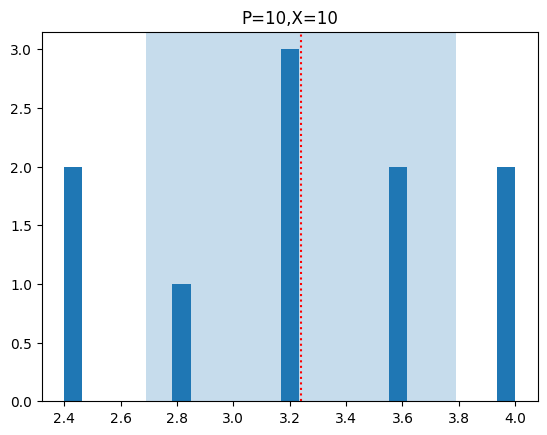

P=10,X=100


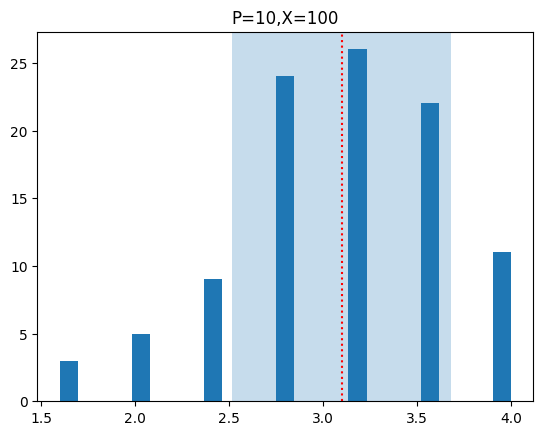

P=10,X=1000


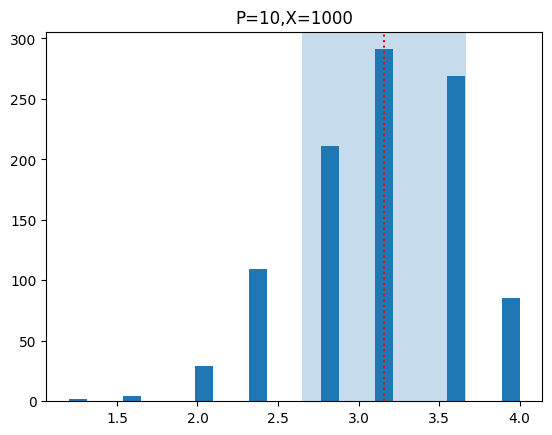

P=10,X=10000


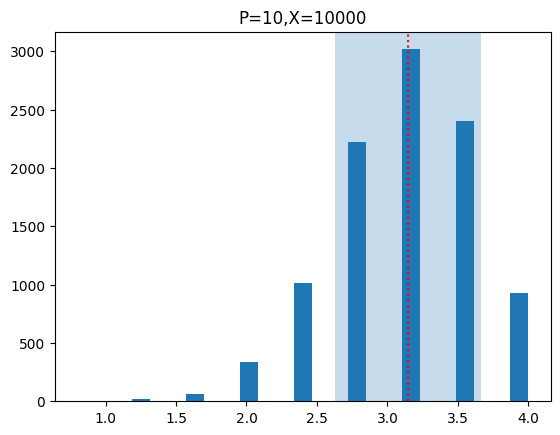

P=100,X=10


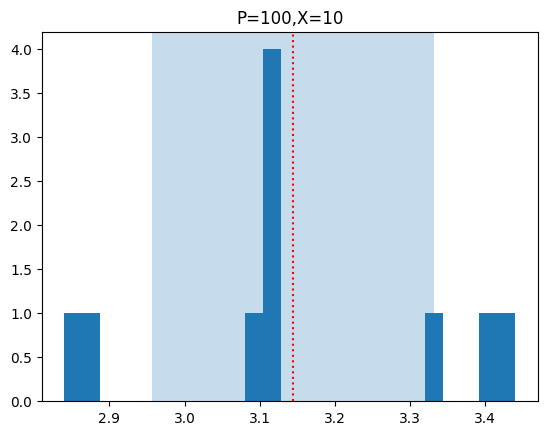

P=100,X=100


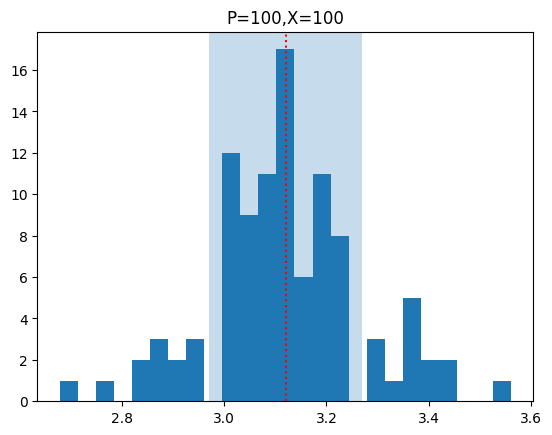

P=100,X=1000


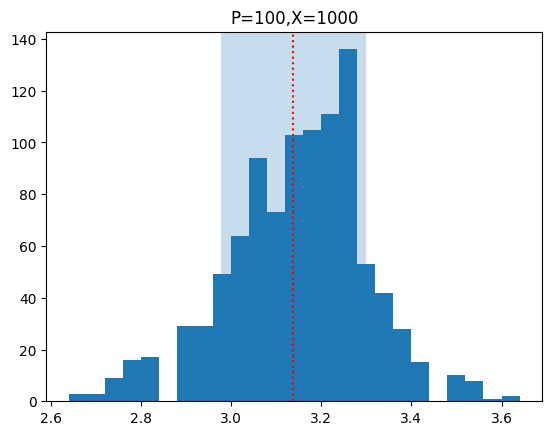

P=100,X=10000


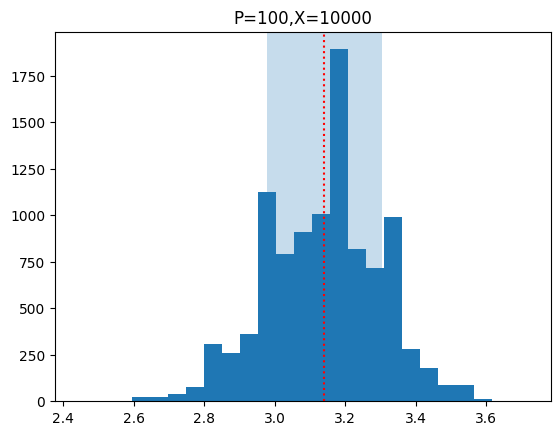

P=1000,X=10


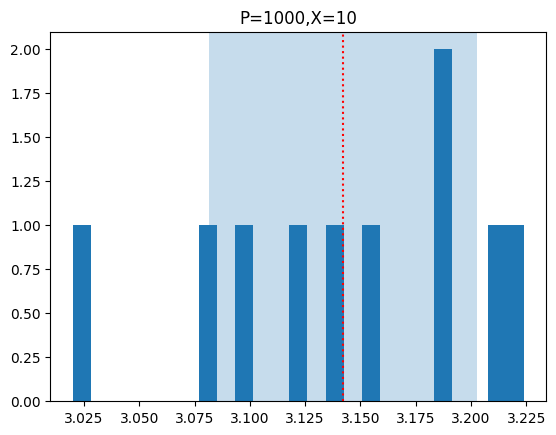

P=1000,X=100


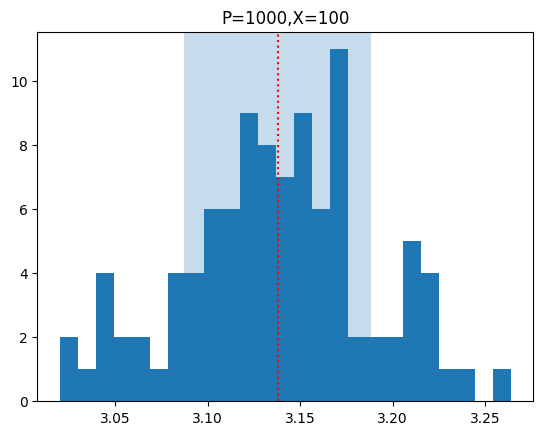

P=1000,X=1000


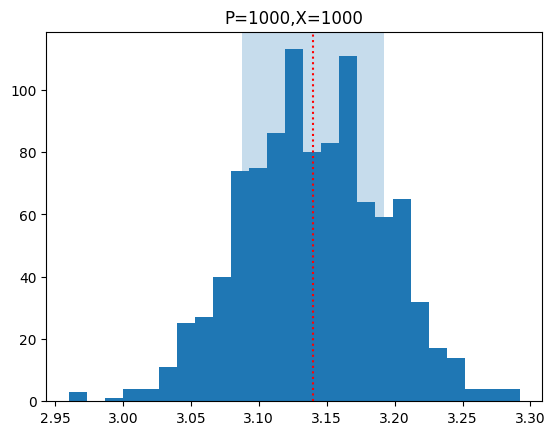

P=1000,X=10000


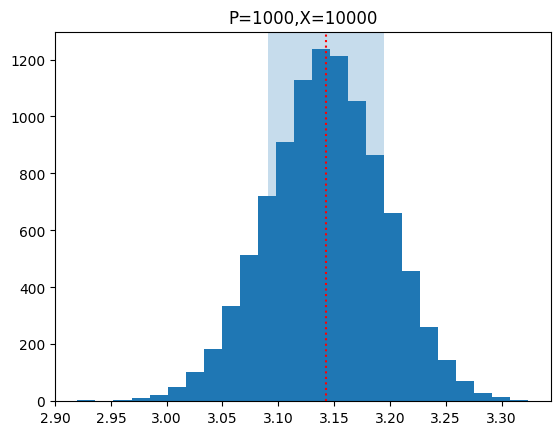

P=10000,X=10


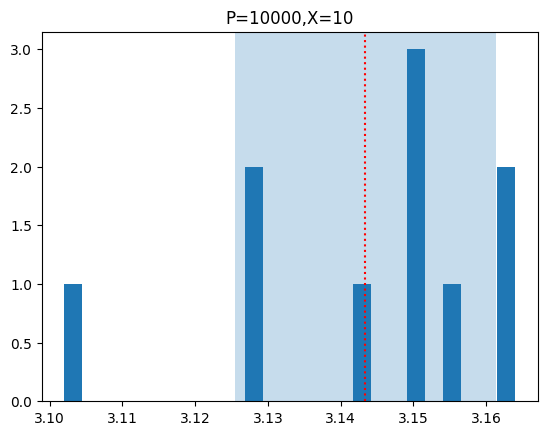

P=10000,X=100


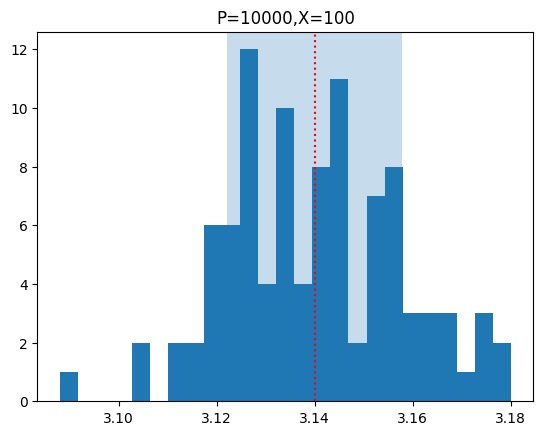

P=10000,X=1000


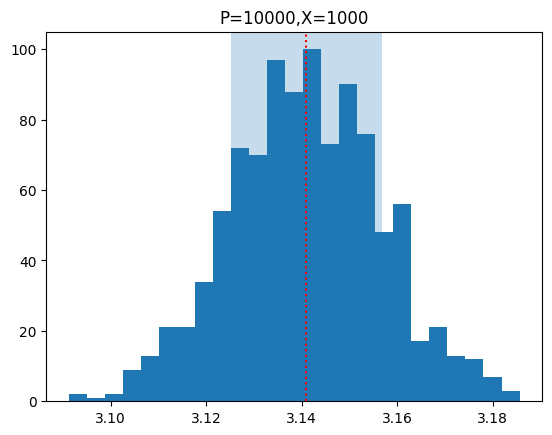

P=10000,X=10000


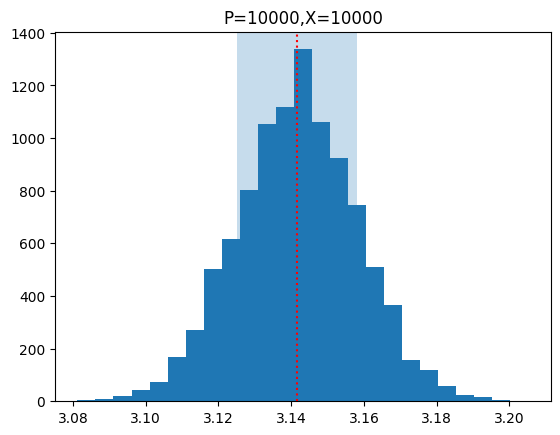

In [16]:
for i in range(4):
    for j in range(4):
        buffer = experiment_result[i][j]
        average = buffer.mean()
        uncertainty = buffer.std()
        print(f'P={n_points_per_experiment[i]},X={n_experiments[j]}')
        plt.hist(buffer, bins=25) 
        plt.axvspan(average-uncertainty, average+uncertainty, alpha=0.25)
        plt.axvline(average, color='red', zorder=1, linestyle=':') #average pi value
        plt.title(f'P={n_points_per_experiment[i]},X={n_experiments[j]}')
        plt.show()

**If you can only afford a fixed number of random pairs across all experiments XP, how should you
spend them? Use the 16 results to explain what you mean.**

Check the reults of all mean values and uncertainty, increasing times of independent experiments do improve to lower th uncertainty. However, the impact of increasing number of shots(pairs) is much more effectively than increasing experiments times. I will choose 10000 pairs with 10 experiments. We don't have loweset uncertainty, but I think this is the most efficiency, affordable one. 

**For each P plot the uncertainty as a function of X; plot it as a log-log plot (with 4 lines or sets of
points or however you like to draw it, one for each P; make sure the viewer can understand which is
which!)**

For X =10
For X =100
For X =1000
For X =10000


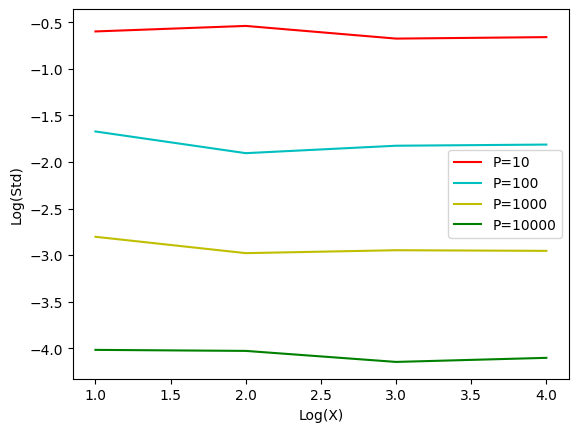

In [20]:
for i in range(4):
    print(f"For P ={n_points_per_experiment}")
    X = [1, 2, 3, 4] 
    uncertainty= []
    for j in range(4):
        buffer = experiment_result[i][j]
        uncertainty.append(buffer.std())
    if i == 0:
        plt.plot(X, np.log(uncertainty), color='r', label='P=10')
    elif i==1:
        plt.plot(X, np.log(uncertainty), color='c', label='P=100')
    elif i==2:
        plt.plot(X,np.log(uncertainty), color='y', label='P=1000')
    else:
        plt.plot(X,np.log(uncertainty), color='g', label='P=10000')
plt.xlabel("Log(X)")
plt.ylabel("Log(Std)")
plt.legend()
plt.show()

**For each X plot the uncertainty as a function of P; plot it as a log-log plot (with 4 lines or sets of
points or whatever, one for each X; make sure the viewer can understand which is which!).**

For X =10
For X =100
For X =1000
For X =10000


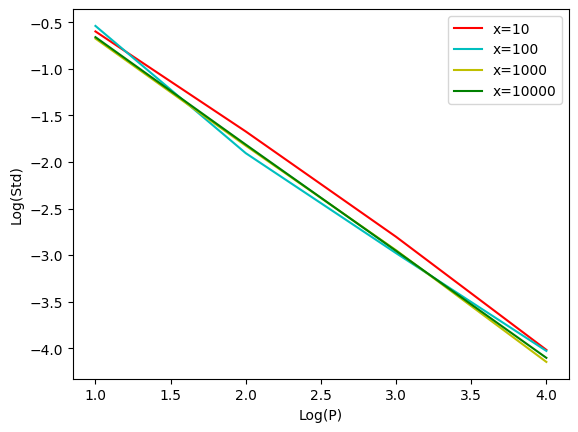

In [22]:
for i in range(4):
    print(f"For X ={n_experiments[i]}")
    P = [1, 2, 3, 4] 
    uncertainty= []
    for j in range(4):
        buffer = experiment_result[j][i]
        uncertainty.append(buffer.std())
    if i == 0:
        plt.plot(P, np.log(uncertainty), color='r', label='x=10')
    elif i==1:
        plt.plot(P, np.log(uncertainty), color='c', label='x=100')
    elif i==2:
        plt.plot(P,np.log(uncertainty), color='y', label='x=1000')
    else:
        plt.plot(P,np.log(uncertainty), color='g', label='x=10000')
plt.xlabel("Log(P)")
plt.ylabel("Log(Std)")
plt.legend()
plt.show()

**Write a few sentences explaining what you see**

We find the most relateive factor to reduce the uncertainty is value of P(number of pairs).